In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw02A.ipynb")

# Homework 2A: Food Safety

## Cleaning and Exploring Data with Pandas

## Due Date: Thursday, February 6th, 11:59 PM
You must submit this assignment to Gradescope by the on-time deadline, Thursday, February 6th, 11:59 PM. Please read the syllabus for the [Slip Day policy](https://ds100.org/sp25/syllabus/#:~:text=is%20considered%20late.-,Slip%20Days,-Each%20student%20gets). No late submissions beyond the details in the Slip Day policy will be accepted. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully when you are submitting your work to Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others, please **include their names** below.

**Collaborators**: *list collaborators here*


## This Assignment

In this homework, we will investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). The main goal for this assignment is to walk through the process of Data Cleaning and familiarise yourself with some of the `pandas` functions discussed in Pandas I and II. 


After this homework, you should be comfortable with:
* Reading CSV files, 
* Reading `pandas` documentation and using `pandas`,
* Working with data at different levels of granularity, and
* Identifying the type of data collected, missing values, anomalies, etc., and doing some basic analysis.

## Score Breakdown 
Question | Manual | Points
--- | --- | ---
1a | no | 1
1b | no | 2
1c | no | 1
2a | no | 1
2bi | no | 1
2bii | no | 1
2ci | no | 1
2cii | no | 1
2d | yes | 1
2e | no | 2
2f | no | 1
3a | no | 1
3b | no | 2
3ci | no | 1
3cii | no | 1
3ciii | no | 1
3civ | no | 1
4a | no | 1
4b | no | 1
4c | no | 1
5a | no | 2
5b | no | 2
Total | 1 | 27


## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.  Our autograder isn't smart enough to check, but you're depriving yourself of key learning objectives if you write loops or comprehensions, and you also won't be ready for the midterm.

The cell below imports all the necessary libraries you need to use during this homework. Without running this cell, you will not be able to call the various `NumPy` and `pandas` functions we use later on, so please make sure you run it before starting to work on the homework.

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

from IPython.display import display, Image 
def display_figure_for_grader(fig):
    plotly.io.write_image(fig, 'temp.png')
    display(Image('temp.png'))    

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 0: Obtaining the Data

## File Systems and I/O


In general, we will focus on using Python commands to investigate files. However, it can sometimes be easier to use shell commands in your local operating system. The following cells demonstrate how to do this.

In [3]:
from pathlib import Path
data_dir = Path('.') # Create a Path object to the current working directory
data_dir.mkdir(exist_ok = True) # Create a directory 
file_path = data_dir / Path('data.zip') # Create a path to the .zip file that contains our datasets
dest_path = file_path

After running the cell above, if you list the contents of the directory containing this notebook, you should see `data.zip`.

*Note*: The command below starts with an `!`. This tells our Jupyter Notebook to pass this command to the operating system. In this case, the command is the `ls` Unix command, which lists files in the current directory.

In [4]:
!ls 

data  data.zip	hw02A.ipynb  Mel.jpg


## Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet. Let's focus on understanding the structure of the data; this involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record? (We sometimes also use the term 'feature' or 'attribute' as well, depending on the context)

Let's start by looking at the contents of `data.zip`. It's not just a single file but rather a compressed directory of multiple files. We could inspect it by uncompressing it using a shell command such as `!unzip data.zip`, but in this homework, we're going to do almost everything in Python for maximum portability.

## Looking Inside and Extracting the Zip Files

The following code blocks are for setup. Simply run the cells; **do not modify them**. Question 1a is where you will start to write code.

Here, we assign `my_zip` to a `zipfile.Zipfile` object representing `data.zip`, and assign `list_names` to a list of all the names of the contents in `data.zip`.

In [5]:
import zipfile
my_zip = zipfile.ZipFile(dest_path, 'r') # Read .zip file at dest_path, which is data.zip
list_names = my_zip.namelist() # Create list of names of contens in data.zip
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/vio.csv',
 'data/sf_zipcodes.json',
 'data/legend.csv']

You may notice that we did not write `zipfile.ZipFile('data.zip', ...)`. Instead, we used `zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest having your filenames hard coded as string literals only once** in a notebook. It is very dangerous to hardcode things twice because if you change one but forget to change the other, you can end up with bugs that are very hard to find.

Now, we display the files' names and their sizes.

In [6]:
my_zip = zipfile.ZipFile(dest_path, 'r') # Read .zip file at dest_path, which is data.zip
for info in my_zip.infolist(): # Extract information about contents of .zip file, iterate through them
    print('{}\t{}'.format(info.filename, info.file_size)) # Print file name and uncompressed file size

data/	0
data/bus.csv	665365
data/ins.csv	1860919
data/ins2vio.csv	1032799
data/vio.csv	4213
data/sf_zipcodes.json	474
data/legend.csv	120


Often when working with zipped data, we'll never unzip the actual zip file. This saves space on our local computer. However, for this homework the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the CSV files using a text editor, which might be handy for understanding the structure of the files. The cell below will unzip the CSV files into a sub-directory called `data`.

In [7]:
data_dir = Path('.') # Create a path to current working directory
my_zip.extractall(data_dir) # Extract all contents from data.zip
!ls {data_dir / Path("data")} # List out contents of "data" sub-directory

bus.csv  ins2vio.csv  ins.csv  legend.csv  sf_zipcodes.json  vio.csv


The cell above created a folder called `data`, and in it, there should be five CSV files. Let's open up `legend.csv` to see its contents. To do this, click on the file icon on the top left to show the folders and files within the hw02A folder, then click `legend.csv`. The file will open up in another tab. You should see something that looks like this:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

The `legend.csv` file does indeed look like a well-formed CSV file. Let's check the other three files. Rather than opening up each file manually, let's use Python to print out the first 5 lines of each. We defined a helper function for you that will allow you to retrieve the first N lines of a file as a list. For example, `head('data/legend.csv', 5)` will return the first 5 lines of `data/legend.csv.gz`. Run the cell below to print out the first 5 lines of all six files that we just extracted from the zip file.

In [8]:
import os

def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f: # Open file for reading
        return list(islice(f, lines)) # Return first five lines of the file as a list

data_dir = "./" # Path to current working directory
for f in list_names: # Iterate through names of contents in "data" sub-directory
    if not os.path.isdir(f): # Check if specified path is a directory
        print(head(data_dir + f, 5), "\n") # Create path to respective file in "data" sub-directory, use `head` function defined above

['"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n', '"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n', '"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n', '"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n'] 

['"iid","date","score","type"\n', '"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n', '"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n', '"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n', '"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n'] 

['"iid","vid"\n', '"97975_20190725","103124"\n', '"85986_20161011","103114"\n', '"95754_2019032

## Reading in and Verifying Data

Based on the above information, let's attempt to load `bus.csv`, `ins2vio.csv`, `ins.csv`, and `vio.csv` into `pandas` `DataFrame`s with the following names: `bus`, `ins2vio`, `ins`, and `vio`, respectively.

*Note:* Because of character encoding issues, one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. At some point in your future, you should read all about [character encodings](https://diveintopython3.problemsolving.io/strings.html). We won't discuss these in detail in Data 100.

In [9]:
# Path to the directory containing data
dsDir = Path('data')

bus = pd.read_csv(dsDir/'bus.csv', encoding='ISO-8859-1')
ins2vio = pd.read_csv(dsDir/'ins2vio.csv')
ins = pd.read_csv(dsDir/'ins.csv')
vio = pd.read_csv(dsDir/'vio.csv')

# This code is essential for the autograder to function properly. Do not edit
bus.loc[:, ["latitude", "longitude"]] = bus.loc[:, ["latitude", "longitude"]].apply(lambda x: np.round(x, 2))
ins_test = ins

Now that you've read the files let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/1.4.3/reference/api/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` `DataFrame`s. For example, running the cell below will display the first few lines of the `bus` `DataFrame`. 

In [10]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675


To show multiple return outputs in one single cell, you can use `display()`. 

In [11]:
display(bus.head())
display(ins.head())

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


The `DataFrame.describe` method can also be handy for computing summaries of numeric columns of our `DataFrame`s. Try it out with each of our 4 `DataFrame`s. Below, we have used the method to give a summary of the `bus` `DataFrame`. 

In [12]:
bus.describe()

,business id column,latitude,longitude,phone_number
count,6253.000000,6253.000000,6253.000000,6.253000e+03
mean,60448.948984,-5575.337974,-5645.817680,4.701819e+09
std,36480.132445,4983.390134,4903.993704,6.667508e+09
min,19.000000,-9999.000000,-9999.000000,-9.999000e+03
25%,18399.000000,-9999.000000,-9999.000000,-9.999000e+03
50%,75685.000000,-9999.000000,-9999.000000,-9.999000e+03
75%,90886.000000,37.780000,-122.420000,1.415533e+10
max,102705.000000,37.820000,0.000000,1.415988e+10


Now, we perform some sanity checks for you to verify that the data was loaded with the correct structure.

First, we check the basic structure of the `DataFrame`s you created:

In [13]:
assert all(bus.columns == ['business id column', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number']) # Check that the `bus` DataFrame contains the right columns in the correct order
assert 6250 <= len(bus) <= 6260 # Check that the `bus` DataFrame has the correct number of rows

assert all(ins.columns == ['iid', 'date', 'score', 'type']) # Similar to above, check that the `ins` DataFrame contains the right columns in order
assert 26660 <= len(ins) <= 26670 # Similar to above, check that the `ins` DataFrame has the correct number of rows

assert all(vio.columns == ['description', 'risk_category', 'vid'])
assert 60 <= len(vio) <= 65

assert all(ins2vio.columns == ['iid', 'vid'])
assert 40210 <= len(ins2vio) <= 40220

*Fun Fact*: The series of `assert` statements above is similar to how course staff implement test cases for assignments! Next time you fail a public test case on an assignment, take a look at the error message and you will probably find the `assert` statement which is causing you to fail the test case.

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [14]:
bus_summary = pd.DataFrame(**{'columns': ['business id column', 'latitude', 'longitude'],
 'data': {'business id column': {'50%': 75685.0, 'max': 102705.0, 'min': 19.0},
  'latitude': {'50%': -9999.0, 'max': 37.82, 'min': -9999.0},
  'longitude': {'50%': -9999.0,
   'max': 0.0,
   'min': -9999.0}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['score'],
 'data': {'score': {'50%': 76.0, 'max': 100.0, 'min': -1.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['vid'],
 'data': {'vid': {'50%': 103135.0, 'max': 103177.0, 'min': 103102.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses DataFrame:')
display(bus_summary)
print('What we expect from your Inspections DataFrame:')
display(ins_summary)
print('What we expect from your Violations DataFrame:')
display(vio_summary)

What we expect from your Businesses DataFrame:


,business id column,latitude,longitude
min,19.0,-9999.00,-9999.0
50%,75685.0,-9999.00,-9999.0
max,102705.0,37.82,0.0


What we expect from your Inspections DataFrame:


,score
min,-1.0
50%,76.0
max,100.0


What we expect from your Violations DataFrame:


,vid
min,103102.0
50%,103135.0
max,103177.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your `DataFrame` are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding errors can cause spurious failures. Run the following cells to load some basic utilities (you do not need to change these at all):

In [15]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two Dataframes on a few summary statistics.
    
    Compute the min, median, and max of the two Dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # Summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if a column is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

We will now explore each file in turn, including determining its granularity and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` `DataFrame`.

<br/>

---

<br/>

# 1: Examining the Business Data File

## Question 1a

From its name alone, we expect the `bus.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

In [16]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675


The `bus` `DataFrame` contains a column called `business id column`, which probably corresponds to a unique business id.  However, we will first rename that column to `bid` for simplicity.

**Note**: In practice, we might want to do this renaming when the table is loaded, but for grading purposes, we will do it here.


In [17]:
bus = bus.rename(columns={"business id column": "bid"})
bus

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675
...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.00,-9999.00,14150452253
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.00,-9999.00,-9999
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.00,-9999.00,14155531280
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.00,-9999.00,14150368085


Examining the entries in `bus`, is the `bid` unique for each record (i.e., each row of data)? Your code should compute the answer, i.e., don't just hard code `True` or `False`.

**Hint**: Use `value_counts()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)) or `unique()` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)) to determine if the `bid` series has any duplicates.

In [18]:
is_bid_unique = len(bus.loc[:, 'bid'].value_counts()) == bus.shape[0]
#is_bid_unique = len(bus.loc[:, 'bid'].unique()) == bus.shape[0]
is_bid_unique

True

In [19]:
grader.check("q1a")

q1a results: All test cases passed!

<br/>

---


## Question 1b

We will now work with some important fields in `bus`.

1. Assign `top_names` to a `NumPy` array or list containing the top 6 most frequently used business names, from most frequent to least frequent. 
2. Assign `top_addresses` to a `NumPy` array or list containing the top 6 addresses where businesses are located, from most popular to least popular.

**Hint 1**: You may find `pd.Series.value_counts` helpful (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)).

**Hint 2**: You'll need to get the names and addresses, NOT the counts associated with each. Some way to **reset the index** would come in handy. If you're unsure how to do this, try looking through the class notes or using a search engine. Part of the goal of this course is to develop independent thinking in the context of the data science lifecycle, which can involve a fair bit of exploring and reading documentation. It may be a bit annoying at first, but you’ll get the hang of it. We’re here to help guide you on that path if you ever need support!

**Hint 3**: To check your answer, `top_names[0]` should return the string `Peet's Coffee & Tea`. It should not be a number.

In [20]:
top_names = bus.loc[:, 'name'].value_counts().head(6).index
top_addresses = bus.loc[:, 'address'].value_counts().head(6).index

#display(top_names[0])
display(top_names)
display(top_addresses)

Index(['Peet's Coffee & Tea', 'Starbucks Coffee', 'McDonald's', 'Jamba Juice',
       'STARBUCKS', 'Proper Food'],
      dtype='object', name='name')

Index(['Off The Grid', '428 11th St', '2948 Folsom St', '3251 20th Ave',
       'Pier 41', '103 Horne Ave'],
      dtype='object', name='address')

In [21]:
grader.check("q1b")

q1b results: All test cases passed!

<br/>

---


## Question 1c

Based on the above exploration, what does each record in the `bus` `DataFrame` represent?

**A**. A city block.

**B**. A chain of restaurants.

**C**. One location of a restaurant.

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, or `"C"`.


In [22]:
q1c = 'C'

In [23]:
grader.check("q1c")

q1c results: All test cases passed!

<br/>

---

<br/>

# 2: Cleaning the Business Data Postal Codes

The business data contains postal code information that we can use to aggregate the ratings over regions of the city. Let's examine and clean the postal code field. The postal code (sometimes also called a [ZIP code](https://en.wikipedia.org/wiki/ZIP_Code)) partitions the city into regions:

<img src="https://gisgeography.com/wp-content/uploads/2023/07/San-Francisco-Zip-Code-Map-1-2048x2048.jpg" alt="ZIP Code Map" style="width: 600px">

<br/>

---


## Question 2a

How many restaurants are in each ZIP code? 

In the cell below, create a **Series** where the index is the postal code, and the value is the number of records with that postal code. The `Series` should be in descending order of count. Do you notice any odd/invalid ZIP codes?


In [24]:
zip_counts = bus.loc[:, 'postal_code'].value_counts()
print(zip_counts.to_string())

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
94301           2
94188           2
94101           2
CA              2
94013           2
941102019       1
941             1
95112           1
94105-2907      1
94102-5917      1
94124-1917      1
94621           1
95122           1
95132           1
95109           1
95133           1
95117           1
94901           1
94105-1420      1
94544           1
64110           1
94122-1909      1
00000           1
94080           1
Ca              1
94602           1
94129           

In [25]:
grader.check("q2a")

q2a results: All test cases passed!

<br/>

--- 

## Question 2b

In Question 2a, we noticed a large number of potentially invalid ZIP codes (e.g., "Ca"). These are likely due to data entry errors. To get a better understanding of the potential errors in the zip codes, let's break down the problem into two parts.

### Part I

Import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json`, and store them as a Series in `valid_zips`. As you may expect, `pd.read_json` works similarly to `pd.read_csv` but for JSON files (a different file format you'll learn more about in HW 3) that you can read more about [here](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html). **Make sure that the resulting series is zero-indexed, with each value being a unique zip code.** If you are unsure of what data type a variable is, remember you can do `type(some_var_name)` to check!

In [26]:
valid_zips = pd.read_json('data/sf_zipcodes.json').loc[:, 'zip_codes']
#valid_zips

In [27]:
grader.check("q2bi")

q2bi results: All test cases passed!

Observe that `pd.read_json` reads data as integers by default. This isn't quite what we want! We would like to store ZIP codes as strings (you'll learn more about why soon!). To do that, we can use the `astype` function to generate a copy of the `pandas` `Series` stored as strings instead.

In [28]:
valid_zips = valid_zips.astype("string")

If you're ever unsure about the data type of a variable, remember you can always check using the `type` function like below:

In [29]:
type(valid_zips.dtype)

pandas.core.arrays.string_.StringDtype

Now it's time to do Part II. You will probably want to use the `Series.isin` function. For more information on this function see the [documentation linked in this internet search](https://www.google.com/search?q=series+isin+pandas&rlz=1C1CHBF_enUS910US910&oq=series+isin+pandas&aqs=chrome..69i57l2j69i59j69i60l2j69i65j69i60l2.1252j0j7&sourceid=chrome&ie=UTF-8). 

**Note:** You are welcome and, in fact, encouraged to search and read the documentation on the internet to complete the assignments in the course, even if the documentation is not linked explicitly.

### Part II

 Construct a `DataFrame` containing only the businesses that **DO NOT** have valid ZIP codes.

In [30]:
invalid_zip_bus = bus[~bus['postal_code'].isin(valid_zips)]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.00,-9999.00,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.00,-9999.00,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.00,-9999.00,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.00,-9999.00,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.00,-9999.00,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.00,-9999.00,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.00,-9999.00,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.00,-9999.00,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.00,-9999.00,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.75,-122.42,-9999


In [31]:
grader.check("q2bii")

q2bii results: All test cases passed!

<br/>

--- 

## Question 2c

In the previous question, many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code. Do they all share a potentially "interesting address"? For that purpose, in the following cells, we will construct a series that counts the number of businesses at each `address` that have this single likely MISSING postal code value. 

Let's break this down into steps: 

### Part 1
Identify the single common missing postal code and assign it to `missing_postal_code`. Then create a `DataFrame`, `bus_missing`, to store only those businesses in `bus` that have `missing_postal_code` as their postal code.

**Hint**: All ZIP codes in the US are *positive* numbers

In [187]:
missing_postal_code = bus[~bus['postal_code'].isin(valid_zips)].loc[:, 'postal_code'].value_counts().index[0]
display(missing_postal_code)
bus_missing = bus[bus['postal_code'] == missing_postal_code]
bus_missing

'-9999'

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.0,-9999.0,14150429222,None
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
...,...,...,...,...,...,...,...,...,...,...
5820,96774,DANIEL SCOTT RIPLEY CATERER,425 Barneveld Ave,San Francisco,CA,-9999,-9999.0,-9999.0,14155212714,None
5843,96938,POKE REESE,3251 Pierce,San Francisco,CA,-9999,-9999.0,-9999.0,14150463411,None
5940,97700,THE ITALIAN HOMEMADE COMPANY,1 franklin Ct,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
6078,98788,333 Truck,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None


In [188]:
grader.check("q2ci")

q2ci results: All test cases passed!

### Part 2
Using `bus_missing`, find the number of businesses at each address (which would all share the same postal code). Specifically, `missing_zip_address_count` should store a `Series` with addresses as the indices and the counts as the values.

In [34]:
missing_zip_address_count = bus_missing.loc[:, 'address'].value_counts()
missing_zip_address_count.head()

address
Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
Name: count, dtype: int64

In [35]:
grader.check("q2cii")

q2cii results: All test cases passed!

<!-- BEGIN QUESTION -->

<br/>

--- 

## Question 2d

**(Written Response)** If we were to drop businesses with postal code values equal to `missing_postal_code`, what **specific types of businesses** would we be excluding? In other words, is there a commonality among businesses with missing postal codes? **Please respond in no more than 2 sentences.**

**Hint**: You may want to identify and Google the names of the businesses with missing postal codes. Feel free to reuse parts of your code from 2c to re-examine `bus_missing` but we will not be grading your code.

_In general, most of the businesses we would be excluding are pop-up restaurants and food trucks. These are establishments that don't have a permanent location and instead move from event to event._

<!-- END QUESTION -->

<br/>

--- 

## Question 2e

Examine the `invalid_zip_bus` `DataFrame` we computed in Question 2c and look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9-digit code rather than the first 5 digits. **Create a new column named `postal5` in the original `bus` `DataFrame`, which contains only the first 5 digits of the `postal_code` column.**

Then, for any of the `postal5` ZIP code entries that were not a valid San Francisco ZIP code (according to `valid_zips`), the provided code will set the `postal5` value to `None`. 

**Hint:** You will find `str` accessors particularly useful. They allow you to use your usual Python string functions in tandem with a `DataFrame`. Refer to the [Pandas II course notes](https://ds100.org/course-notes/pandas_2/pandas_2.html#:~:text=babyname_lengths%20%3D%20babynames%5B%22Name%22%5D.str.len()) for examples.

**Do not modify the provided code! Simply add your own code in place of the ellipses.**


In [36]:
bus['postal5'] = None
#display(invalid_zip_bus[invalid_zip_bus['postal_code'] != missing_postal_code].head()) 
bus['postal5'] = bus.loc[:, 'postal_code'].str[0:5]


bus.loc[~bus['postal5'].isin(valid_zips), 'postal5'] = None
# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


In [37]:
grader.check("q2e")

q2e results: All test cases passed!

<br/>

---

<br/>

## Question 2f

Finally, use the `postal5` column to create a `DataFrame`, `bus_valid`, that only contains the rows of `bus` where a `postal5` zip code exists. You may find the `.isna()` function useful here.

In [38]:
bus_valid = bus[~bus.loc[:, 'postal5'].isna()]
bus_valid

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675,94124
...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.00,-9999.00,14150452253,94118
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.00,-9999.00,-9999,94107
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.00,-9999.00,14155531280,94102
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.00,-9999.00,14150368085,94103


In [39]:
grader.check("q2f")

q2f results: All test cases passed!

<br/>

---

<br/>

# 3: Investigate the Inspection Data

Let's now turn to the inspection `DataFrame`. Earlier, we found that `ins` has 4 columns named 
`iid`, `score`, `date`, and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [40]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


<br/>

---

## Question 3a

The column `iid` probably corresponds to an inspection ID. Write an expression (i.e., a line of code) that evaluates to `True` or `False` based on whether all the inspection IDs are unique. Your code should compute the answer, i.e., don't just hard code `True` or `False`.

**Hint:** This is a very similar question to Question 1a.

In [41]:
is_ins_iid_unique = len(ins.loc[:, 'iid'].value_counts()) == ins.shape[0]
is_ins_iid_unique 

True

In [42]:
grader.check("q3a")

q3a results: All test cases passed!

<br/>

---

## Question 3b

We want to extract `bid` from each row of the `ins` `DataFrame`. If we look carefully, the column `iid` of the `ins` `DataFrame` appears to be composed of two numbers, and the first number looks like a business ID.  

Create a new column called `bid` in the `ins` Dataframe containing just the business ID. You will want to use `ins['iid'].str` operations. (Python's in-built `split` method could come in use; read up on the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)!) Also, be sure to convert the type of this column to `int`. 

**Hint**: Similar to an earlier problem where we used `astype("string")` to convert a column to a string, here you should use `astype` to convert the `bid` column into type `int`. **No Python `for` loops or list comprehensions are allowed.** This is on the honor system since our autograder isn't smart enough to check, but if you're using `for` loops or list comprehensions, you're doing the HW incorrectly. 

In [43]:
ins['bid'] = ins['iid'].astype('string').str.split('_').str[:1].explode().reset_index(drop=True).astype(int)
ins.head(5)

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017


In [44]:
grader.check("q3b")

q3b results: All test cases passed!

<br/>

---

## Question 3c

For this part, we're going to explore some new, somewhat strange syntax that we haven't seen in the lecture. Don't panic! If you're not sure what to do, try experimenting or Googling, and don't shy away from talking to other students or course staff.

For this problem, we'll use the time component of the inspection data.  All this information is given in the `date` column of the `ins` `DataFrame`. 

**No Python `for` loops or list comprehensions are allowed!**

### Part I

What is the type of the individual `ins['date']` entries? You may want to grab the very first entry and use the `type` function in Python. 

In [45]:
ins_date_type = type(ins['date'][0])
ins_date_type

str

In [46]:
grader.check("q3ci")

q3ci results: All test cases passed!

### Part II
Rather than the type you discovered in Part 1, we want each entry in `pd.TimeStamp` format. You might expect that the usual way to convert something from its current type to `TimeStamp` would be to use `astype`. You can do that, but the more typical way is to use `pd.to_datetime` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)). Using `pd.to_datetime`, create a new `ins['timestamp']` column containing `pd.Timestamp` objects. These will allow us to do date manipulation with much greater ease in parts III and IV. 

**Note:** You may run into a `UserWarning` error if you do not specify the date format when using `pd.to_datetime`. To resolve this, consider using the following string to specify the `format`: `'%m/%d/%Y %I:%M:%S %p'`. This particular format specifies that we would like our `pd.TimeStamp`s in the form `Month`/`Day`/`Year` `Hour`(12-hr)/`Minute`/`Second` `AM/PM`

In [53]:
format_string = '%m/%d/%Y %I:%M:%S %p'
ins['timestamp'] = pd.to_datetime(ins['date'], format=format_string)
display(ins['timestamp'])
display(ins)

0       2019-03-29
1       2019-04-03
2       2019-04-17
3       2019-08-16
4       2019-08-26
           ...    
26658   2018-09-24
26659   2018-11-02
26660   2019-09-09
26661   2017-12-07
26662   2018-08-08
Name: timestamp, Length: 26663, dtype: datetime64[ns]

,iid,date,score,type,bid,timestamp
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26
...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07


In [54]:
grader.check("q3cii")

q3cii results: All test cases passed!

### Part III

What are the earliest and latest dates in our inspection data?  

**Hint**: you can use `min` and `max` on dates of the correct type.

In [55]:
earliest_date = min(ins['timestamp'])
latest_date = max(ins['timestamp'])
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


In [56]:
grader.check("q3ciii")

q3ciii results: All test cases passed!

### Part IV

We probably want to examine the inspections by year. Create an additional `ins['year']` column containing just the year of the inspection. Consider using `pd.Series.dt.year` to do this.

In case you're curious, the documentation for `TimeStamp` data can be found at [this link](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas.Timestamp).

In [59]:
ins['year'] = ins['timestamp'].dt.year
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


In [60]:
grader.check("q3civ")

q3civ results: All test cases passed!

<br/>

---

<br/>

# 4: Benford's Law

[Benford’s Law](https://en.wikipedia.org/wiki/Benford%27s_law), also known as the Law of Anomalous Numbers or the First Digit Law, is a phenomenon seen in many real-world datasets. In datasets where Benford’s Law applies, there is an overrepresentation of small numbers (e.g., 1 and 2) in the leading digits of numeric entries and an underrepresentation of large numbers (e.g., 8 and 9). Benford’s Law is observed in river lengths, national populations, and has even been used to investigate [financial fraud](https://www.acfe.com/acfe-insights-blog/blog-detail?s=what-is-benfords-law-and-why-fraud-examiners-use-it)! More about Benford’s Law can be found [here](https://www.scientificamerican.com/article/what-is-benfords-law-why-this-unexpected-pattern-of-numbers-is-everywhere/).

<img src="https://static.scientificamerican.com/sciam/assets/File/BenfordsLaw_graphic_d%5B68%5D.jpg?w=1350" alt="Benford's Law Distribution" style="width: 600px">

Let’s investigate whether or not the **address** numbers in the `bus_valid` `DataFrame` follow Benford’s Law.

## Question 4a

First, create a new column, `first_char` that contains the first character of the address string of each restaurant in `bus_valid`. **Again, do not use for loops or list comprehensions in your solution**.

In [62]:
bus_valid["first_char"] = bus_valid['address'].str[:1]
bus_valid

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110,3
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284,94133,P
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839,94103,4
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315,94124,1
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675,94124,2
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.00,-9999.00,14150452253,94118,3
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.00,-9999.00,-9999,94107,3
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.00,-9999.00,14155531280,94102,4
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.00,-9999.00,14150368085,94103,4


In [63]:
grader.check("q4a")

q4a results: All test cases passed!

<br/>

---

## Question 4b

Unfortunately, not all of the addresses in `bus_valid` start with a number. Create a new `DataFrame` `bus_digits` that only contains the rows of `bus_valid` where the restaurant's address starts with a digit between 1 and 9.

Note: Do **not** include rows in which the first digit of the address is a 0.

*Hint*: You may find the `s.str.isnumeric()` `Series` method useful here.

In [64]:
help(pd.Series.str.isnumeric)

Help on function isnumeric in module pandas.core.strings.accessor:

isnumeric(self)
    Check whether all characters in each string are numeric.
    
    This is equivalent to running the Python string method
    :meth:`str.isnumeric` for each element of the Series/Index. If a string
    has zero characters, ``False`` is returned for that check.
    
    Returns
    -------
    Series or Index of bool
        Series or Index of boolean values with the same length as the original
        Series/Index.
    
    See Also
    --------
    Series.str.isalpha : Check whether all characters are alphabetic.
    Series.str.isnumeric : Check whether all characters are numeric.
    Series.str.isalnum : Check whether all characters are alphanumeric.
    Series.str.isdigit : Check whether all characters are digits.
    Series.str.isdecimal : Check whether all characters are decimal.
    Series.str.isspace : Check whether all characters are whitespace.
    Series.str.islower : Check whether all char

In [183]:
bus_digits = bus_valid.loc[(bus_valid['first_char'].str.isnumeric() == True) & (bus_valid['first_char'] != '0')]         
bus_digits#.first_char.value_counts()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110,3
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839,94103,4
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315,94124,1
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675,94124,2
5,100036,Hula Truck (#2),2 Marina Blvd,San Francisco,CA,94123,-9999.00,-9999.00,-9999,94123,2
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.00,-9999.00,14150452253,94118,3
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.00,-9999.00,-9999,94107,3
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.00,-9999.00,14155531280,94102,4
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.00,-9999.00,14150368085,94103,4


In [184]:
grader.check("q4b")

q4b results: All test cases passed!

<br/>

---

## Question 4c

Plot a histogram that shows the frequency of each possible first digit among the addresses in `bus_digits`. Like you did in Homework 1, create bins of unit length that are centered at each of the digits and assign it to `bins_arr`.

**Note**: You only need to define `digits_arr` and `bins_arr`. The code necessary to plot the histogram has already been provided for you.

array([3, 4, 1, ..., 4, 4, 7])

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

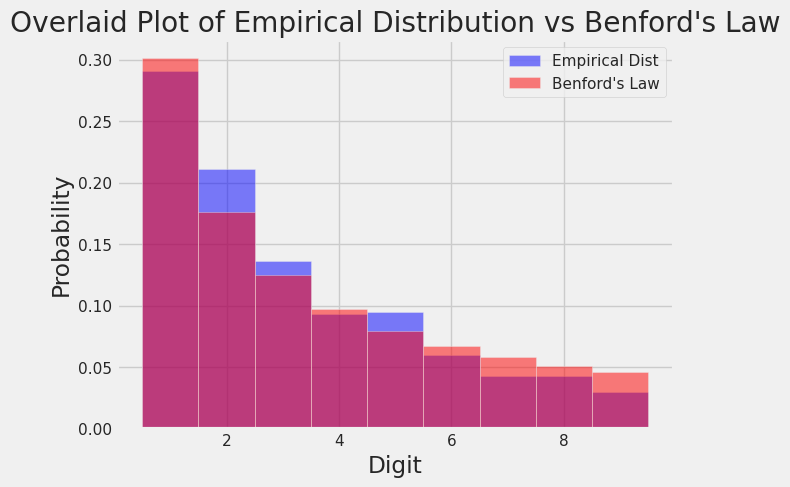

In [185]:
digits_arr = bus_digits['first_char'].astype(int).values
display(digits_arr)
bins_arr = np.arange(0.5, 10.5)
display(bins_arr)

# DO NOT CHANGE BELOW
benford = np.array([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]) # Array of proportions under Benford's Law
plt.hist(digits_arr, bins = bins_arr, density = True, alpha = 0.5, color = "blue", label = "Empirical Dist") # Plot digits_arr, the empirical distribution
plt.bar(np.arange(1, 10), height = benford, width = 1, alpha = 0.5, color = "red", label = "Benford's Law") # Plot the theoretical distribution under Benford's Law
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title("Overlaid Plot of Empirical Distribution vs Benford's Law")
plt.legend();

In [186]:
grader.check("q4c")

q4c results: All test cases passed!

We have worked extensively with postal codes in this homework assignment. As prevalent and fascinating as it is, Benford's Law does not apply to *any* dataset. Benford's Law applies to datasets in which the numbers are *naturally generated*, which means that we will not be able to observe the same phenomenon in the leading digits of postal codes across the United States which are *manually assigned*. 

<img src="https://www.unitedstateszipcodes.org/images/zip-codes/zip-codes.png" alt="Leading Digit of ZIP Code across US" style="width: 600px">

<br/>

---

# 5: Search for the Closest Restaurant

Conan plans to go on a weekend trip to San Francisco, where he hopes to grab some food near Fisherman’s Wharf. He believes that the closer he is to the area the better the food will be, so he chooses a restaurant solely by its coordinates.

## Question 5a

Create a new `DataFrame` `bus_coords`, which includes only the rows of `bus_valid` where both the latitude and longitude values are not missing. 

**Hint:** Missing values for latitude and longitude values are the *same* as the most frequent missing value you found in **Question 2c**!

In [192]:
bus_coords = bus_valid.loc[(bus_valid['latitude'] != -9999.00) & (bus_valid['longitude'] != -9999.00)]
bus_coords

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110,3
27,1002,BIG MOUTH BURGERS,3392 24th St,San Francisco,CA,94110,37.75,-122.42,-9999,94110,3
51,1003,RINCON PERUANO RESTAURANT,3364 26th St,San Francisco,CA,94110,37.75,-122.42,14155897712,94110,3
52,10030,Marshall Elementary School,1575 15th St,San Francisco,CA,94103,37.77,-122.42,14155246280,94103,1
81,1005,CHAVITA'S MEXICAN RESTAURANT,3006 MISSION St,San Francisco,CA,94110,37.75,-122.42,14155286927,94110,3
...,...,...,...,...,...,...,...,...,...,...,...
6075,9869,Donut World,1399 09th Ave,San Francisco,CA,94122,37.76,-122.49,-9999,94122,1
6117,99,J & M A-1 CAFE RESTAURANT LLC,779 Clay St,San Francisco,CA,94108,37.79,-122.41,-9999,94108,7
6182,994,RAILROAD EXPRESSO CAFE,705 Monterey Blvd,San Francisco,CA,94127,37.73,-122.45,14155334009,94127,7
6190,9948,Whole Foods Market,399 04th St,San Francisco,CA,94107,37.78,-122.40,-9999,94107,3


In [193]:
grader.check("q5a")

q5a results: All test cases passed!

<br/>

---

## Question 5b

To be close to Fisherman’s Wharf, Conan would like to find the **three restaurants** in the `bus_coords` `DataFrame` that are furthest north, breaking ties by prioritizing restaurants that are furthest east. Return the `name`, `address`, and `postal5` ZIP code of the three restaurants as a `DataFrame` and assign it to `top3`. Here is an [article](https://www.techtarget.com/whatis/definition/latitude-and-longitude#:~:text=Latitudes%20are%20horizontal%20lines%20that,or%20places%20on%20the%20globe.) that succinctly explains latitude and longitude.

**Hint:** Feel free to reference the [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) to see how you can sort by multiple values.

In [194]:
# SCRATCH CELL
# Feel free to do your rough work here
# Do not add a cell between your solution and the grader cell
top_3_sorted = bus_coords.sort_values(['latitude', 'longitude'], ascending=False).head(3)[['name', 'address', 'postal5']]
top_3_sorted
#top_3_sorted[['name', 'address', 'postal5']]

,name,address,postal5
1466,Island Market & Deli,2 Ave of the Palms Bldg. 146,94130
2140,Treasure Island Bar & Grill,60 Clipper Cove Way Treasure Island,94130
1287,Alcatraz Landing Cafe,Pier 31 Parking Lot,94111


In [195]:
top3 = bus_coords.sort_values(['latitude', 'longitude'], ascending=False).head(3)[['name', 'address', 'postal5']]
top3

,name,address,postal5
1466,Island Market & Deli,2 Ave of the Palms Bldg. 146,94130
2140,Treasure Island Bar & Grill,60 Clipper Cove Way Treasure Island,94130
1287,Alcatraz Landing Cafe,Pier 31 Parking Lot,94111


In [126]:
grader.check("q5b")

q5b results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Mel says congratulations! You have finished Homework 2A! ##

<img src = "Mel.jpg" width = "500">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSenPfvkr0iHmkxD0v4bjEyo1iH2g0znEYe-OEkShrJikFkFfg/viewform?usp=sf_link). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 2A Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 2A Written assignment. 

**Important**: Please check that your written responses were generated and submitted correctly to the HW 2A Written Assignment. 

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 2A written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [196]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q2a results: All test cases passed!

    q2bi results: All test cases passed!

    q2bii results: All test cases passed!

    q2ci results: All test cases passed!

    q2cii results: All test cases passed!

    q2e results: All test cases passed!

    q2f results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q3ci results: All test cases passed!

    q3cii results: All test cases passed!

    q3ciii results: All test cases passed!

    q3civ results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!

    q4c results: All test cases passed!

    q5a results: All test cases passed!

    q5b results: All test